In [1]:
import sys
import os
sys.path.append("/home/kirilman/Project/asbestos/yolov5")
sys.path.append("/home/kirilman/Project/asbestos/")
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import cv2
from tools import plot_bboxs
from pathlib import Path
from dataset.albumentaion import yolo_image_generator, Albumentations
%load_ext autoreload
%autoreload 2|
from utils.dataloaders import LoadImagesAndLabels, create_dataloader
import albumentations as A

/home/kirilman/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


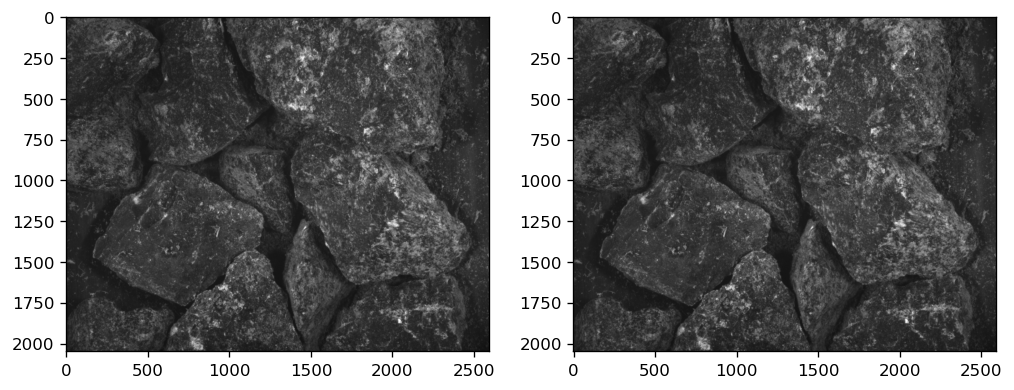

In [2]:
path_to_dataset = Path('/home/kirilman/Project/dataset/detection_set2/train/images')
im_files = os.listdir(path_to_dataset)
img = cv2.imread(path_to_dataset / im_files[13])
T = A.RandomBrightnessContrast()
alb_img = T(image=img)['image']
fig, ax = plt.subplots(1,2, dpi = 120, figsize = (10,10))
ax[0].imshow(img)
ax[1].imshow(alb_img)

In [ ]:
IMG_SIZE = 728
inf, loader = create_dataloader(path_to_dataset, IMG_SIZE, 1, 0, single_cls= True, augment = True, hyp={"degrees":45, #поворот
                                                                    "translate":0.,
                                                                    "scale":0.01,              #маштабирование
                                                                            "shear":0.3,      #сферические линии
                                                                            "perspective":0.0,
                                                                    "copy_paste":0.5,
                                                                    "flipud":0,
                                                                    "mixup":0.5,
                                                                                                        
                                                                    "mosaic": True,
                                                                    "hsv_h": 1,
                                                                    "hsv_v": 1, "hsv_s":1, "fliplr":1,"fliplr":1,
                                                                                                        
                                                                    })

In [ ]:
img, labels = loader.load_mosaic(0)
fig, axs = plt.subplots(1,2, figsize = (8,8), dpi = 200)
axs[0].imshow(img)
axs[0].grid('minor')
img = plot_bboxs(img, labels[:,1:]/IMG_SIZE)
axs[1].imshow(img)

In [ ]:
IMG_SIZE = 728
inf, loader = create_dataloader(path_to_dataset, IMG_SIZE, 1, 0, single_cls= True, augment = True, hyp={"degrees":0, #поворот
                                                                    "translate":0.,
                                                                    "scale":0.01,              #маштабирование
                                                                            "shear":0.3,      #сферические линии
                                                                            "perspective":0.0,
                                                                    "copy_paste":0.5,
                                                                    "flipud":0,
                                                                    "mixup":0.5,
                                                                                                        
                                                                    "mosaic": False,
                                                                    "hsv_h": 1,
                                                                    "hsv_v": 1, "hsv_s":1, "fliplr":1,"fliplr":1,
                                                                                                        
                                                                    })

In [ ]:
exm = loader[112]
img = exm[0].numpy()
labesls = exm[1].numpy()
t = np.zeros((IMG_SIZE,IMG_SIZE,3))
t[:,:,0] = img[0,:,:]
t[:,:,1] = img[1,:,:]
t[:,:,2] = img[2,:,:]
del img
img = t
img = img/img.max()

img = plot_bboxs(img, labels[:,1:]/IMG_SIZE)
plt.figure(figsize = (8,8),dpi = 120)
plt.imshow(img)

In [ ]:
plt.figure(figsize = (12,12))

img, labels = loader.load_mosaic(15)
# labels = loader.labels[6]

N = 3
r = k = 0
f, axes = plt.subplots(N,N, dpi = 200)
plt.axis('off')  
for i in range(N*N):
    img, labels = loader.load_mosaic(0)
    axes[r,k].imshow(img)
    axes[r,k].axis('off')  
    k+=1
    if i%3 == 1:
        r +=1
        k = 0


In [ ]:
img, labels = loader.load_mosaic(0)
plt.figure(dpi = 100)
plt.imshow(plot_bboxs(img, labels[:,1:]/IMG_SIZE))

In [7]:
%cd ../notebooks/dataloader/

/home/kirilman/Project/asbestos/notebooks/dataloader


In [4]:
%cd /home/kirilman/Project/asbestos/notebooks/dataloader/
!pwd
!python ../../yolov5/train.py --img 512 --batch 4 --epochs 30 --data ../../../dataset/detection_set2/data_simple.yaml \
--weights 'yolov5l6.pt' \
--single-cls --name 'yolov5l6_evolve' \
--evolve 
# --hyp ../../../dataset/detection_set2/trash_params.yaml

/home/kirilman/Project/asbestos/notebooks/dataloader
/home/kirilman/Project/asbestos/notebooks/dataloader
wandb: Currently logged in as: kirilman. Use `wandb login --relogin` to force relogin
train: weights=yolov5l6.pt, cfg=, data=../../../dataset/detection_set2/data_simple.yaml, hyp=../../yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=4, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=300, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=True, optimizer=SGD, sync_bn=False, workers=8, project=../../yolov5/runs/train, name=yolov5l6_evolve, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 201 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-295-gf

In [6]:
!python ../../yolov5/detect.py --weights /home/kirilman/Project/asbestos/yolov5/runs/train/yolov5m_merge/weights/best.pt \
--img 512 \
--source ../../../dataset/detection_set2/test/ \
--save-txt \
# --conf-thres 0.5 
# --source /home/kirilman/Project/dataset/detection_set2/test/

detect: weights=['/home/kirilman/Project/asbestos/yolov5/runs/train/yolov5m_merge/weights/best.pt'], source=../../../dataset/detection_set2/test/, data=../../yolov5/data/coco128.yaml, imgsz=[512, 512], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../../yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/72 /home/kirilman/Project/dataset/detection_set2/test/10_11_56_13_16-03-2020_1.jpg: 416x512 13 rocks, Done. (0.011s)
image 2/72 /home/kirilman/Project/dataset/detection_set2/test/10_11_56_42_16-03-2020_1.jpg: 416x512 13 rocks, Done. (

In [3]:
!python ../../yolov5/val.py --weights ../../yolov5/runs/train/yolov5m_merge/weights/best.pt \
--img 512 --data /home/kirilman/Project/dataset/detection_set2/for_test.yaml --workers 0 --batch-size  4

val: data=/home/kirilman/Project/dataset/detection_set2/for_test.yaml, weights=['../../yolov5/runs/train/yolov5m_merge/weights/best.pt'], batch_size=4, imgsz=512, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=0, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../../yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning '/home/kirilman/Project/dataset/detection_set2/test.cache' images 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         72       1812      0.695      0.685      0.696      0.487
Speed: 0.1ms pre-process, 7.6ms inference, 0.7ms NMS per image at shape (4, 3, 512, 512)
Results saved to ../../yolov5/runs/

In [27]:
!python ../../yolov5/detect.py --weights ../../yolov5/runs/train/yolov5l6_simple/weights/best.pt \
--img 512 \
--source "/home/kirilman/Project/dataset/task_pit_from_phone-2022_04_15_12_27_27/task_pit_from_phone-2022_04_15_12_27_27-cvat for images 1.1/images/"

detect: weights=['../../yolov5/runs/train/yolov5l6_simple/weights/best.pt'], source=/home/kirilman/Project/dataset/task_pit_from_phone-2022_04_15_12_27_27/task_pit_from_phone-2022_04_15_12_27_27-cvat for images 1.1/images/, data=../../yolov5/data/coco128.yaml, imgsz=[512, 512], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../../yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

Fusing layers... 
Model summary: 476 layers, 76118664 parameters, 0 gradients
image 1/33 /home/kirilman/Project/dataset/task_pit_from_phone-2022_04_15_12_27_27/task_pit_from_phone-2022_04_15_12_27_27-cvat for images 1.1/images/IMG_2596.JPG: 384x512 9 rock

In [9]:
%cd asbestos/notebooks/dataloader/
!python ../../yolov5/detect.py --weights /home/kirilman/Project/asbestos/yolov5/runs/train/without_aug_yolov3/weights/best.pt \
--img 512 \
--source ../../../dataset/detection_set2/test \
--save-txt \
--name 'yolov3'

/home/kirilman/Project/asbestos/notebooks/dataloader
detect: weights=['/home/kirilman/Project/asbestos/yolov5/runs/train/without_aug_yolov3/weights/best.pt'], source=../../../dataset/detection_set2/test, data=../../yolov5/data/coco128.yaml, imgsz=[512, 512], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../../yolov5/runs/detect, name=yolov3, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61497430 parameters, 0 gradients
image 1/72 /home/kirilman/Project/dataset/detection_set2/test/10_11_56_13_16-03-2020_1.jpg: 416x512 13 rocks, Done. (0.020s)
image 2/72 /home/kirilman/Project/dataset/detection_set2/test/10_11_5

In [28]:
import os
p = '/home/kirilman/Project/asbestos/yolov5/runs/train'
os.listdir(p)
for model in os.listdir(p):
    if os.path.isfile("../../yolov5/runs/train/{}/weights/best.pt".format(model)):
        !python ../../yolov5/val.py --weights ../../yolov5/runs/train/{model}/weights/best.pt \
        --img 512 --data /home/kirilman/Project/dataset/detection_set2/for_test.yaml --workers 0 --batch-size  4 --save-txt
        print("----------------------------\n")

val: data=/home/kirilman/Project/dataset/detection_set2/for_test.yaml, weights=['../../yolov5/runs/train/without_aug_hyp_l/weights/best.pt'], batch_size=4, imgsz=512, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=0, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=False, project=../../yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients
val: Scanning '/home/kirilman/Project/dataset/detection_set2/test.cache' images 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         72       1812      0.768      0.607      0.656      0.461
Speed: 0.1ms pre-process, 12.1ms inference, 0.6ms NMS per image at shape (4, 3, 512, 512)
Results saved to ../../yolov5/runs/val/exp20

In [ ]:
for model in [without_aug_x,

In [44]:
# %cd ../../
!python ../../yolov5/val.py --weights ../../yolov5/runs/train/albumentation_yolov3_custum_aug+modif_yolo/weights/best.pt \
--img 512 --data /home/kirilman/Project/dataset/detection_set2/data.yaml --workers 0 --batch-size  4

val: data=/home/kirilman/Project/dataset/detection_set2/data.yaml, weights=['../../yolov5/runs/train/albumentation_yolov3_custum_aug+modif_yolo/weights/best.pt'], batch_size=4, imgsz=512, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=0, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../../yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61497430 parameters, 0 gradients
val: Scanning '/home/kirilman/Project/dataset/detection_set2/validation.cache' i
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         18        788      0.691      0.618      0.671      0.393
Speed: 0.1ms pre-process, 16.7ms inference, 1.6ms NMS per image at shape (4, 3, 512, 512)
Results saved to ../.

In [12]:
!python ../../yolov5/val.py --weights ../../yolov5/runs/train/yolov5_cbox/weights/best.pt \
--img 256 --conf 0.7 --data /home/kirilman/Project/dataset/detection_set2/data.yaml --workers 0 --batch-size  4

val: data=/home/kirilman/Project/dataset/detection_set2/data.yaml, weights=['../../yolov5/runs/train/yolov5_cbox/weights/best.pt'], batch_size=4, imgsz=256, conf_thres=0.7, iou_thres=0.6, task=val, device=, workers=0, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../../yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.9.12 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5947MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients
val: Scanning '/home/kirilman/Project/dataset/detection_set2/validation.cache' i
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         18        788      0.821      0.438      0.637      0.435
Speed: 0.1ms pre-process, 5.1ms inference, 0.5ms NMS per image at shape (4, 3, 256, 256)
Results saved to ../../yolov5/runs/val/exp34


### Yolov7

In [32]:
##### %cd ../../yolov7/
!python train.py --img 512 --batch 4 --epochs 200 --data /home/kirilman/Project/dataset/detection_set2/data_merge.yaml \
--weights 'yolov7.pt' --cfg cfg/training/yolov7.yaml --name 'yolov7_merge_evolve' \
--hyp ../../dataset/detection_set2/hyp.scratch.p5.yaml 
# --single-cls

YOLOR 🚀 v0.1-103-g6ded32c torch 1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5946.5625MB)

Namespace(weights='yolov7.pt', cfg='cfg/training/yolov7.yaml', data='/home/kirilman/Project/dataset/detection_set2/data_merge.yaml', hyp='../../dataset/detection_set2/hyp.scratch.p5.yaml', epochs=200, batch_size=4, img_size=[512, 512], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='yolov7_merge_evolve', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], world_size=1, global_rank=-1, save_dir='runs/train/yolov7_merge_evolve', total_batch_size=4)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters

In [ ]:
## %cd ../../yolov7/
!python test.py --weights /home/kirilman/Project/asbestos/yolov7/runs/train/yolov7_merge3/weights/best.pt \
--img 512 --data /home/kirilman/Project/dataset/detection_set2/for_test.yaml --batch-size  4 

In [18]:
# %cd ../../yolov7/
# !python detect.py --weights ./runs/train/yolov7_simple/weights/best.pt \
# --img 512 \
# --source "/home/kirilman/Загрузки/Асбест/images/images_excursion/" \
# --save-txt \
# --conf-thres 0.4 \
# --name "images_camera" 


%cd ../../yolov7/
!python detect.py --weights ./runs/train/yolov7_merge3/weights/best.pt \
--img 512 \
--source "/home/kirilman/Project/dataset/detection_set2/test/" \
--save-txt \
--conf-thres 0.1 \
--name "merge" \
# --device "cpu"

[Errno 2] No such file or directory: '../../yolov7/'
/home/kirilman/Project/asbestos/yolov7
Namespace(weights=['./runs/train/yolov7_merge3/weights/best.pt'], source='/home/kirilman/Project/dataset/detection_set2/test/', img_size=512, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='merge', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-103-g6ded32c torch 1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5946.5625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/kirilman/miniconda3/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr

In [11]:
%cd ../yolov7/
!python test.py --weights ./runs/train/yolov7_simple/weights/best.pt \
--img 512 --data /home/kirilman/Project/dataset/detection_set2/data.yaml

/home/kirilman/Project/asbestos/yolov7
Namespace(weights=['./runs/train/yolov7_simple/weights/best.pt'], data='/home/kirilman/Project/dataset/detection_set2/data.yaml', batch_size=32, img_size=512, conf_thres=0.001, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-103-g6ded32c torch 1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5946.5625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/kirilman/miniconda3/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layer

In [12]:
!python detect.py --weights runs/train/yolov7_simple/weights/best.pt --no-trace \
--img 512 \
--source /home/kirilman/Project/dataset/detection_set2/test/ \
--save-txt

Namespace(weights=['runs/train/yolov7_simple/weights/best.pt'], source='/home/kirilman/Project/dataset/detection_set2/test/', img_size=512, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 v0.1-103-g6ded32c torch 1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5946.5625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/kirilman/miniconda3/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS
14 roc

In [2]:
%cd ../../YOLOv6/

/home/kirilman/Project/asbestos/YOLOv6


In [ ]:
%cd ../../yolov7/
!python train.py --img 640 --batch 2 --epochs 300 --data /home/kirilman/Project/dataset/detection_set2/data_simple.yaml \
--weights 'yolov7.pt' --cfg cfg/training/yolov7.yaml --name 'yolov7_640' \
--hyp ../../dataset/detection_set2/hyp.scratch.p5.yaml
# --single-cls

In [6]:
!python tools/train.py --img 512 --batch 2 --conf configs/yolov6m.py --data  /home/kirilman/Project/dataset/detection_set2/yolov6.yaml \
--name 'yolov6m' \
--epochs 200

Using 1 GPU for training... 
training args are: Namespace(data_path='/home/kirilman/Project/dataset/detection_set2/yolov6.yaml', conf_file='configs/yolov6m.py', img_size=512, batch_size=2, epochs=200, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='yolov6m', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, calib=False, teacher_model_path=None, temperature=20, rank=-1, world_size=1, save_dir='runs/train/yolov6m1')

Train: Final numbers of valid images: 308/ labels: 308. 
0.0s for dataset initialization.
Convert to COCO format
100%|████████████████████████████████████████| 18/18 [00:00<00:00, 20047.12it/s]
Convert to COCO format finished. Resutls saved in /home/kirilman/Project/dataset/detection_set2/for yolov6/annotations/instances_val.js

In [2]:
%cd ../../YOLOv6/
# %cd ../YOLOv6/

/home/kirilman/Project/asbestos/YOLOv6


In [6]:
!python tools/eval.py --img 512 --weights ./runs/train/yolov6m1/weights/best_ckpt.pt \
--data /home/kirilman/Project/dataset/detection_set2/yolov6_for_text.yaml --do_coco_metric True \
# --task val

Namespace(data='/home/kirilman/Project/dataset/detection_set2/yolov6_for_text.yaml', weights='./runs/train/yolov6m1/weights/best_ckpt.pt', batch_size=32, img_size=512, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', test_load_size=640, letterbox_return_int=False, scale_exact=False, force_no_pad=False, not_infer_on_rect=False, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='')
Loading checkpoint from ./runs/train/yolov6m1/weights/best_ckpt.pt

Fusing model...
/home/kirilman/miniconda3/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Swi

In [1]:
%cd ../../YOLOv6/

/home/kirilman/Project/asbestos/YOLOv6


In [2]:
!python tools/infer.py --weights runs/train/yolov6m1/weights/best_ckpt.pt --save-txt \
--source '/home/kirilman/Project/dataset/detection_set2/for yolov6/images/test' \
# --img 576 \

# --conf-thres 0.4

Namespace(weights='runs/train/yolov6m1/weights/best_ckpt.pt', source='/home/kirilman/Project/dataset/detection_set2/for yolov6/images/test', yaml='data/coco.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=True, save_img=True, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Loading checkpoint from runs/train/yolov6m1/weights/best_ckpt.pt

Fusing model...
/home/kirilman/miniconda3/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
100%|███████████████████████████████████████████| 72/72 [00:05<00:00, 12.04it/s]
Results saved to runs/inference/exp


In [26]:
ls

assets/   deploy/          LICENSE           runs/            yolov6/
configs/  docs/            README.md         tools/
data/     inference.ipynb  requirements.txt  turtorial.ipynb
